# Komatsu Inequality


arxiv:math/0607694v1

$$ \phi(x) = e^{x^2/2}\int_x^\infty e^{-t^2/2}\,dt $$

For all $x \geq 0$ we have

$$ \frac{2}{E_1(x/2)} < \phi(x) \frac{\sqrt{2}}{E_1(x/\sqrt{2})} $$

where $$E_t(x) = \sqrt[t]{tx + \sqrt{(tx)^2+1}} \quad(t>0)$$
is an approximation to the exponential function around $x=0$.

**(Question)** Can we improve the bounds by choosing a better $0 < t < 1$ (and adjusting other constants if needed)?

## Numerical hints

In [1]:
var("x t")

(x, t)

In [2]:
%display latex
phi = exp(x^2/2) * integral(e^(-t^2/2),t,x,oo)
phi

-1/2*(sqrt(2)*sqrt(pi)*erf(1/2*sqrt(2)*x) - sqrt(2)*sqrt(pi))*e^(1/2*x^2)

In [3]:
E = lambda t: (t*x + sqrt(t^2*x^2+1))^(1/t)
E(t)

(t*x + sqrt(t^2*x^2 + 1))^(1/t)

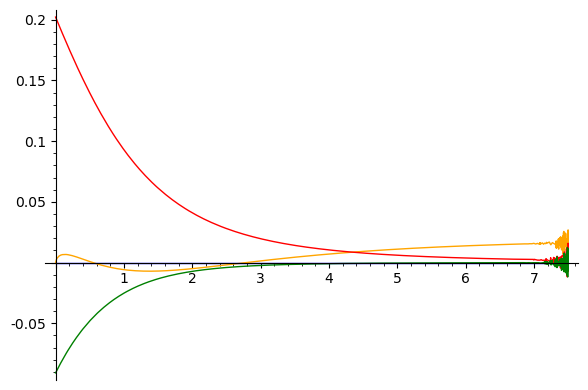

In [285]:
ran = (x,0,7.5)
t0 = 0.9
s = phi(0) * (2*t0)^(-1/t0)
plot(0,ran)\
    +plot(1/phi(0) * E(t0)((s*x)^(t0))- 1/phi,ran,color="orange")\
    + plot(E(1)(x/2)-1/phi,ran,color="red")\
    + plot((3*x+sqrt(x^2+8))/4-1/phi,ran,color="green")\
    #

In [203]:
diff(1/phi,x)(0)

2/pi

In [209]:
diff(E(t)(x=2/pi*x),x)(x=0)

2/pi

In [150]:
phi(0)

1/2*sqrt(2)*sqrt(pi)

In [151]:
float(sqrt(pi)/2)

0.8862269254527579

In [245]:
(1/phi(0)*E(t)(x=(phi(0)*(2*t)^(-1/t)*x)^(t)))(x=0,t=0.6)

sqrt(2)/sqrt(pi)

In [244]:
1/phi(0)

sqrt(2)/sqrt(pi)

In [267]:
var("a t")
diff(E(t)(x=x^t),x)

(t^3*x^(2*t - 1)/sqrt(t^2*x^(2*t) + 1) + t^2*x^(t - 1))*(t*x^t + sqrt(t^2*x^(2*t) + 1))^(1/t - 1)/t

In [258]:
(E(t)(x=a*x^t))(x=0)

(0^t*a*t + sqrt(0^(2*t)*a^2*t^2 + 1))^(1/t)

In [253]:
1/phi(0)

sqrt(2)/sqrt(pi)

In [254]:
diff(1/phi,x)(x=0)

2/pi

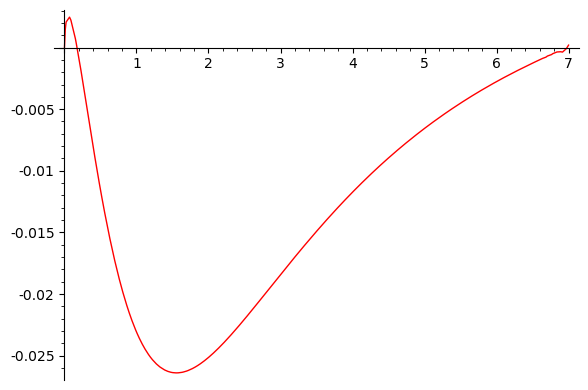

In [368]:
t0 = 0.92
b0 = sqrt(2/pi)
a0 = (b0^(-t0))/2/t0
ran = (x,0,7)
f = b0*E(t0)(x=a0*x^t0)
plot(f - 1/phi, ran, color="red")

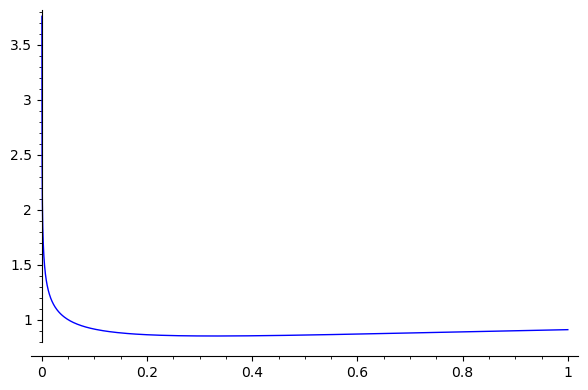

In [325]:
plot(diff(f,x),(x,0,1))

In [27]:
c = q(x=0)
c

-1/2*sqrt(2)*sqrt(pi) + sqrt(2)/sqrt(pi)

In [28]:
d = diff(q,x)(x=0)
d

2/pi

We try to approximate the remaining term with a sigmoid function. None is perfect, but it seems the arcus tangens and $x/(1+x^\alpha)^{1/\alpha}$ seem to work best.

In [194]:
#sigmoid = 2*(1/(1+exp(-2*x))-1/2)
sigmoid = tanh(x)
sigmoid = erf(sqrt(pi)/2*x)
sigmoid = atan(pi/2*x)/(pi/2)
alpha = 3/2
sigmoid = x/(1+x^(alpha))^(1/(alpha))
# should be equal to (0,1,1)
#sigmoid(0), diff(sigmoid,x)(x=0), limit(sigmoid,x=oo)



In [195]:
f = c - c * sigmoid(-d/c*x)
expand(diff(f,x)(x=0)), f(x=0)

(2/pi, -1/2*sqrt(2)*sqrt(pi) + sqrt(2)/sqrt(pi))

In [196]:
f

-1/2*sqrt(2)*sqrt(pi) + sqrt(2)/sqrt(pi) + 2*x/(pi*(8*(x/(pi*(sqrt(2)*sqrt(pi) - 2*sqrt(2)/sqrt(pi))))^(3/2) + 1)^(2/3))

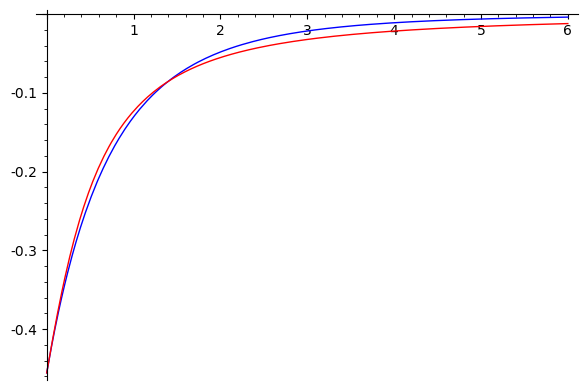

In [197]:
L = (x^t-x^(-t))/2/t
ran = (x,0,6)
q = 2*L(t=1)(1/phi)-x
plot(q, ran, color="blue")\
    + plot(f, ran, color="red")\
    #

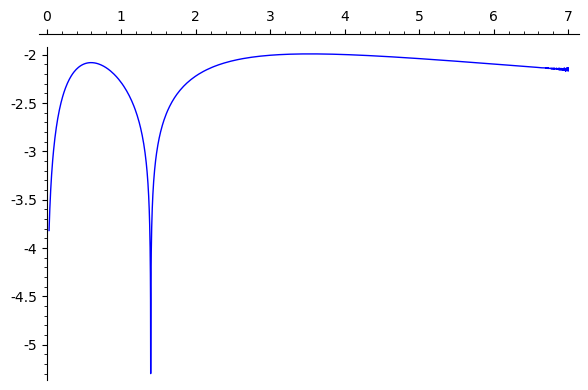

In [223]:
approx = 1/E(1)((x+f)/2)
ran = (x,0,7)
plot(log(abs(1/phi - 1/approx))/log(10), ran)

In [224]:
simplify(approx)

-4/(sqrt(2)*sqrt(pi) - 2*x - sqrt((sqrt(2)*sqrt(pi) - 2*x - 2*sqrt(2)/sqrt(pi) - 4*x/(pi*(8*(x/(pi*(sqrt(2)*sqrt(pi) - 2*sqrt(2)/sqrt(pi))))^(3/2) + 1)^(2/3)))^2 + 16) - 2*sqrt(2)/sqrt(pi) - 4*x/(pi*(8*(x/(pi*(sqrt(2)*sqrt(pi) - 2*sqrt(2)/sqrt(pi))))^(3/2) + 1)^(2/3)))

In [225]:
float(approx(8)), float(phi(8))

(0.12322430754742708, 0.12273309508232018)

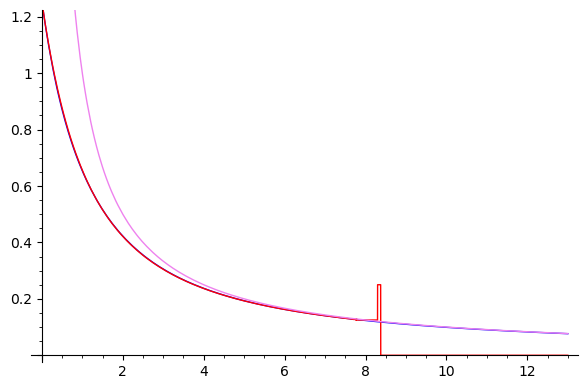

In [228]:
ran = (x,0,13)
plot(approx,ran)\
    + plot(phi,ran,color="red")\
    + plot(1/x,ran,color="violet",ymax=1.2)
    #

In [213]:
float(phi(8))

0.12273309508232018